
# Artificial Neural Network:

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
# Initialising the ANN
classifier = Sequential() # This creates an empty nural network 

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [12]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))


In [13]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))



In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 110us/step - loss: 0.7885 - accuracy: 0.5850 - val_loss: 0.5240 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 0s 80us/step - loss: 0.4879 - accuracy: 0.8005 - val_loss: 0.4612 - val_accuracy: 0.8076
Epoch 3/100
5359/5359 [==============================] - 0s 74us/step - loss: 0.4514 - accuracy: 0.8078 - val_loss: 0.4434 - val_accuracy: 0.8107
Epoch 4/100
5359/5359 [==============================] - 0s 80us/step - loss: 0.4315 - accuracy: 0.8123 - val_loss: 0.4282 - val_accuracy: 0.8160
Epoch 5/100
5359/5359 [==============================] - 0s 73us/step - loss: 0.4140 - accuracy: 0.8220 - val_loss: 0.4172 - val_accuracy: 0.8232
Epoch 6/100
5359/5359 [==============================] - 0s 82us/step - loss: 0.3995 - accuracy: 0.8343 - val_loss: 0.4079 - val_accuracy: 0.8266
Epoch 7/100
5359/5359 [==============================] - 0s 73us/step - lo

5359/5359 [==============================] - 0s 74us/step - loss: 0.3356 - accuracy: 0.8591 - val_loss: 0.3668 - val_accuracy: 0.8459
Epoch 55/100
5359/5359 [==============================] - 0s 77us/step - loss: 0.3354 - accuracy: 0.8612 - val_loss: 0.3665 - val_accuracy: 0.8459
Epoch 56/100
5359/5359 [==============================] - 0s 85us/step - loss: 0.3350 - accuracy: 0.8623 - val_loss: 0.3662 - val_accuracy: 0.8463
Epoch 57/100
5359/5359 [==============================] - 0s 78us/step - loss: 0.3351 - accuracy: 0.8604 - val_loss: 0.3668 - val_accuracy: 0.8470
Epoch 58/100
5359/5359 [==============================] - 0s 74us/step - loss: 0.3346 - accuracy: 0.8597 - val_loss: 0.3651 - val_accuracy: 0.8463
Epoch 59/100
5359/5359 [==============================] - 0s 75us/step - loss: 0.3345 - accuracy: 0.8610 - val_loss: 0.3654 - val_accuracy: 0.8478
Epoch 60/100
5359/5359 [==============================] - 0s 74us/step - loss: 0.3343 - accuracy: 0.8608 - val_loss: 0.3646 - val_a

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


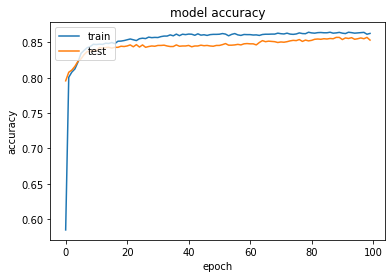

In [19]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


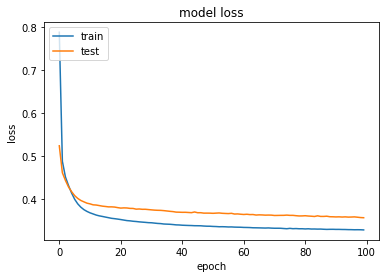

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[1499,   96],
       [ 184,  221]], dtype=int64)

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86